In [8]:
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('AvalDiscente_20xx-x.csv', sep=';', error_bad_lines=False)

header = list(df.columns.values) #list with column names

for h in header[2:-1]:
    #replaces NaN values with None
    df[h][df[h].isnull()] = None
    #replaces commas with dots for floats
    df[h] = df[h].str.replace(",",".")
    #converts everything to float
    df[h] = df[h].astype(float)
    #df[h].apply(lambda(x): ((float(x)) if (type(x) == str)))


## group question results by subject and class ##
df_di_tu = df.groupby(['Disciplina', 'Turma'])
mean_di_tu = {}
for group in df_di_tu:
    #assigns to key (subjects, class) the mean value of each question
    mean_di_tu[group[0]] = group[1].mean()

## creates new dataframe to hold means only ##
df_di_tu = pd.DataFrame(columns=header)
i=0
for key, value in mean_di_tu:
    valores = []
    #makes a list of all mean values
    for v in mean_di_tu[(key, value)]:
        valores.append(v)
    #concatenates with the key
    valores = [key, value] + valores
    #new row for each class
    df_di_tu.loc[i] = valores
    i+=1

/home/siegmeyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [3]:
print(df)

                                       Disciplina Turma   Q1   Q2   Q3   Q4  \
0                  ALGORÍTMOS E PROGRAMAÇÃO - CIC     A  4.0  5.0  2.0  3.0   
1                  ALGORÍTMOS E PROGRAMAÇÃO - CIC     A  4.0  3.0  2.0  3.0   
2                  ALGORÍTMOS E PROGRAMAÇÃO - CIC     A  5.0  3.0  4.0  4.0   
3                  ALGORÍTMOS E PROGRAMAÇÃO - CIC     A  5.0  4.5  1.0  1.0   
4                  ALGORÍTMOS E PROGRAMAÇÃO - CIC     A  4.0  3.0  3.0  4.0   
5                  ALGORÍTMOS E PROGRAMAÇÃO - CIC     A  NaN  5.0  5.0  4.0   
6                  ALGORÍTMOS E PROGRAMAÇÃO - CIC     A  NaN  5.0  5.0  5.0   
7                  ALGORÍTMOS E PROGRAMAÇÃO - CIC     A  5.0  5.0  NaN  4.0   
8                  ALGORÍTMOS E PROGRAMAÇÃO - CIC     A  NaN  5.0  NaN  4.0   
9                  ALGORÍTMOS E PROGRAMAÇÃO - CIC     A  NaN  5.0  5.0  5.0   
10                 ALGORÍTMOS E PROGRAMAÇÃO - CIC     A  NaN  5.0  5.0  5.0   
11                 ALGORÍTMOS E PROGRAMAÇÃO - CIC   

In [4]:
print(df_di_tu)

                                      Disciplina Turma        Q1        Q2  \
0                 ALGORÍTMOS E PROGRAMAÇÃO - CIC     A  4.580000  4.711538   
1                 ALGORÍTMOS E PROGRAMAÇÃO - CIC     B  4.605556  4.871429   
2                 ALGORÍTMOS E PROGRAMAÇÃO - CIC     C  4.252000  4.503571   
3                 ALGORÍTMOS E PROGRAMAÇÃO - CIC     D  4.500000  4.666667   
4                 ALGORÍTMOS E PROGRAMAÇÃO - CIC     E  4.922727  4.813793   
5                 ALGORÍTMOS E PROGRAMAÇÃO - CIC     F  4.709524  4.876190   
6     ARQUITETURA E DESEMPENHO DE BANCO DE DADOS     U  4.500000  4.905556   
7    ARQUITETURA E ORGANIZAÇÃO DE COMPUTADORES I     A  4.511538  4.992593   
8    ARQUITETURA E ORGANIZAÇÃO DE COMPUTADORES I     B  4.435000  4.819048   
9    ARQUITETURA E ORGANIZAÇÃO DE COMPUTADORES I     C  4.477273  4.704167   
10  ARQUITETURA E ORGANIZAÇÃO DE COMPUTADORES II     U  4.134615  3.475000   

          Q3        Q4        Q5        Q6        Q7        Q8 

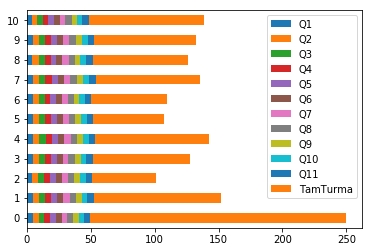

In [11]:
df_di_tu.plot.barh(stacked=True)
#df_di_tu.plot.barh(x=df_di_tu['Turma'], stacked=True)
plt.show()